<a href="https://colab.research.google.com/github/uzair011/PyTorch-fndmntl/blob/main/02_PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural network classification with pytorch
Classification is a problem of predicting whether something is onething or another (there can be multiple things as te options)

### 01. Make classification data and get it ready


In [2]:
import sklearn

In [3]:
from sklearn.datasets import make_circles

# make 1000 samples
n_circles = 1000

# create circles
X, y = make_circles(n_circles,
                    noise=0.03,
                    random_state=42)

In [4]:
len(X), len(y)

(1000, 1000)

In [5]:
print(f"First 5 samples of X are: \n{X[:5]}")
print(f"\nFirst 5 samples of y are: \n{y[:5]}")

First 5 samples of X are: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 samples of y are: 
[1 1 1 1 0]


In [6]:
y # Binary classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [7]:
# Make dataframe of circle data
import pandas as pd

circles = pd.DataFrame({ "X1": X[:, 0],
                         "X2": X[:, 1],
                         "Label": y })

circles.head(10)

,X1,X2,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [8]:
circles.Label.value_counts()


1    500
0    500
Name: Label, dtype: int64

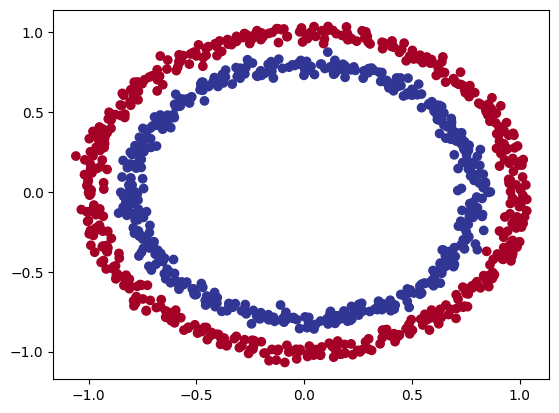

In [9]:
# VisUAliZE,...
import matplotlib.pyplot as plt

plt.scatter(
    x = X[:, 0],
    y = X[:, 1],
    c = y, # labels
    cmap=plt.cm.RdYlBu
);

**NOTE:** The data we are working with is often reffered to as Toy dataset, a dataset that is small enouth to experiment with but, still sizeable enough to practice the fundermentals.

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f" Values for one sample of X{X_sample} and the same for {y_sample}")
print(f" Shapes for one sample of X{X_sample.shape} and the same for {y_sample.shape}")

 Values for one sample of X[0.75424625 0.23148074] and the same for 1
 Shapes for one sample of X(2,) and the same for ()


###1.2 Turn data into Tensors and training splits

In [12]:
import torch
torch.__version__

'2.1.0+cu118'

In [13]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [14]:
# Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [15]:
type(X), X.dtype

(torch.Tensor, torch.float32)

In [16]:
type(y)

torch.Tensor

In [17]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [18]:
torch.manual_seed(42)

In [19]:
# Split the data into train and test data sets.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2, # 20% of the data will be used to testing, 80% will be used to training...
    random_state=42
)

In [20]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [21]:
from scipy.optimize._lsq.bvls import OptimizeResult


## 2. Build hte model

Build a model to classify the blue and red dots.

To do so, we want to:
1. Setup the device agonistic code so, the code will run on accelerator (GPU) if there is one
2. Construct a model by subclassing `nn.Module`
3. Define a loss function and a Optimizer.
4. Create a training and testing loop.


In [22]:
# Import pytorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [23]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [24]:
X_train.shape

torch.Size([800, 2])

 Create a model that,
 1. Subclasses `nn.Module` (almost all the models in pytorch subclasses `nn.Module`).
 2. Create 2 `nn.Linear()` layers that are capable of handling shapes of our data.
 3. Define a `forward()` that outlines the forward pass ( of forward computation) of the model.
 4. Instanciate an instance of our model class and send it to the target device.

In [25]:
from sklearn import datasets
#1. Construct a model that subclasses nn.module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    #2. Create 2 nn.Linear() layers that are capable of handling shapes of our data.
    self.layer_1 = nn.Linear(in_features=2, out_features=5)  # Takes 2 features and upscale it to 5 features...
    self.layer_2 = nn.Linear(in_features=5, out_features=1)  # Takes 5 features from previous layer and output 1 feature. (Same as y)

  #3. Define a forward() that outlines the forward pass
  def forward(slef, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

  #4. Instanciate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [26]:
device

'cuda'

In [27]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [28]:
# Replicate the model above using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features = 5),
    nn.Linear(in_features = 5, out_features = 1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [29]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [30]:
# Make Predictions

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\n First 10 predictions: \n {torch.round(untrained_preds[:10])}")
print(f"\n First 10 labels: \n {y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions: 
 tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

 First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup a loss function and an optimizer

This is problem specific...

for example, For regression we want to use MAE or MSE (Mean absalute error or Mean squared error)
For Classification we want to use Binary cross entrophy or Categorical cross entrophy (Cross entropy)

the Loss function measures how *wrong* our models predictions are...

And for the optimizers, two of the most common optimizers are SGD and Adam. however, pytorch has multiple built-in options.

- read about common choices for pytorch and optimizers on the work book.
- Learn about the BCEWithLogitsLoss()



In [31]:
from pandas.compat.pyarrow import pa   # CHECK THIS LINE
# Setup the loss function.
# loss_fn = BECLoss() - requires inputs to gothrough sigmoid function before to input to BCELoss()

loss_fn = nn.BCEWithLogitsLoss() # Sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [32]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [33]:
# Calculate accuracy - out of 100 predictions, what percentage of our model gets correct?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  accuracy = (correct / len(y_pred)) * 100
  return accuracy

# 3. Training loop

* To train our model, we need to build a training loop.

  1. Forwrd pass
  2. Calculate the loss
  3. Zero grad
  4. Loss backward (back propagation)
  5. Optimizer step (gradient descent)

# 3.1 Going from   raw logits  - > prediction probabilities - > prediction labels

Our model outputs are going to be raw **Logits**.

We can convert these **logits** to prediction probabilities by passing them to some kind of activation function.
 (Eg: Sigmoid for binary classificaiton and Softmax for Multiclass classification)

 Then we can convert our model's **prediction probabilities** to prediction lables by rounding up them or taking the `argmax()`.

In [34]:
# View the first 5 outputs of the forward pass on the test data.

model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [35]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [36]:
# Use the sigmoid activation on our model logits to turn them into prediction probabilities...

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probabilities, we need to perform a range-style rounding on them,
* if `y_pred_probs` >= 0.5 then, y = 1 (Class 1)
* if `y_pred_probs` < 0.5 then, y = 0 (Class 0)

In [37]:
#torch.round(y_pred_probs)

# Find the predicted lables
y_preds = torch.round(y_pred_probs)

# In full  (Logits -> prediction probabilities -> prediction labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of the dimentions
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

### 3.2 Building a Training and a Testing loop

In [38]:
 model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [39]:
# Forwrd pass
# Calculate the loss
# Zero grad
# Loss backward (back propagation)
# Optimizer step (gradient descent)

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

#Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1.Forward Pass()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))  # Turn logits -> predict probs -> prediction labels

  # 2. Calculate Loss & Accuracy

  #loss = loss_fn(torch.sigmoid(y_logits,    # nnBCELoss expects prediction probabilities as inputs
  #                            y_train))

  loss = loss_fn(y_logits,     # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)

  accuracy = accuracy_fn(y_true = y_train,
                         y_pred = y_pred)


  # 3.Optimizer
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward() # Backpropagation

  # 5. Optimizer step
  optimizer.step() # Gradient descent


  ## Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_prediction = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss/accuracy

    test_loss = loss_fn(test_logits,
                      y_test)

    test_accuracy = accuracy_fn(y_true= y_test,
                                y_pred= test_prediction)


    # Print whats hapenin' in our code
    if epoch % 10 == 0:
      print(f"Epoch = {epoch} | Loss = {loss:5f} Accuracy = {accuracy:2f}% | Test Loss = {test_loss:.5f} Test_accuracy = {test_accuracy:.2f}%")



Epoch = 0 | Loss = 0.697960 Accuracy = 51.875000% | Test Loss = 0.69440 Test_accuracy = 58.00%
Epoch = 10 | Loss = 0.695898 Accuracy = 51.250000% | Test Loss = 0.69305 Test_accuracy = 53.00%
Epoch = 20 | Loss = 0.694902 Accuracy = 51.625000% | Test Loss = 0.69254 Test_accuracy = 49.50%
Epoch = 30 | Loss = 0.694350 Accuracy = 51.125000% | Test Loss = 0.69236 Test_accuracy = 49.50%
Epoch = 40 | Loss = 0.694009 Accuracy = 50.875000% | Test Loss = 0.69232 Test_accuracy = 51.00%
Epoch = 50 | Loss = 0.693782 Accuracy = 50.250000% | Test Loss = 0.69234 Test_accuracy = 50.00%
Epoch = 60 | Loss = 0.693623 Accuracy = 50.000000% | Test Loss = 0.69239 Test_accuracy = 51.50%
Epoch = 70 | Loss = 0.693508 Accuracy = 50.250000% | Test Loss = 0.69246 Test_accuracy = 51.00%
Epoch = 80 | Loss = 0.693422 Accuracy = 49.875000% | Test Loss = 0.69254 Test_accuracy = 50.00%
Epoch = 90 | Loss = 0.693357 Accuracy = 49.875000% | Test Loss = 0.69262 Test_accuracy = 53.00%


## 4. Make predictions and evaluate the model

It looks like the model is not learning...

To check lets visualize it...

To do that, we are going to import `plot_decision_boundary()`

In [40]:
import requests
from pathlib import Path

# download helper functions from Learn pyTorch repository if it is not already downloaded...

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists... Skipping download")
else:
  print("Downloading helper_functions.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

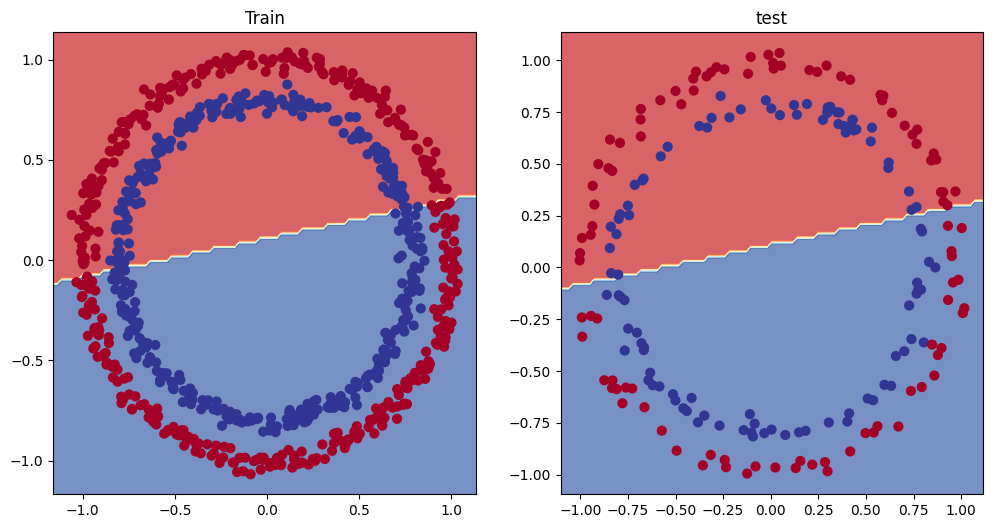

In [41]:
# Plot decision boundary of the model

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Improving the model - (from the model's perspective)

* Add more layers - More chances to the model to learn
* Add more HIDDEN layers - from 5 to maybe 10
* Fit for longer - increase the epochs count
* Change the activation function - sigmoid to other ...
* Change the learning rate
* Change the loss function

# All these options are for model's perspective because they all directly deal with the model, rather than the data.
# And these options are all values that we (ML Engineers, Data Scientists) can change, tey are referred to **Hyperparameters.**

In [42]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0849, -0.2762],
                      [ 0.4610, -0.5187],
                      [-0.3271, -0.1947],
                      [-0.4220,  0.0507],
                      [-0.7016,  0.6600]])),
             ('0.bias', tensor([-0.6060,  0.5246,  0.1149, -0.2211,  0.4275])),
             ('1.weight',
              tensor([[ 0.0741,  0.2406,  0.0222, -0.1075,  0.1965]])),
             ('1.bias', tensor([-0.1888]))])

In [43]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)

    return self.layer_3(self.layer_2(self.layer_1(x)))   # This way of writing operations leverage speedups where possible, in behind the scences.


model_1 = CircleModelV1().to(device)
print(model_1)


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)


In [44]:
# Create a loss function
# Create an optimizer

loss_fn2 = nn.BCEWithLogitsLoss()
optimizer_2 = torch.optim.SGD(params=model_1.parameters(),
                              lr = 0.1)


In [45]:
# Create a training and evaluation loop for model_1

torch.manual_seed(42)
torch.cuda.manual_seed(42)

# train for longer
epochs = 1000

# Put the data to the correct device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [46]:

# Loop throgh the epochs
for epoch in range(epochs):
  ## 1. training
  model_1.train()

  # 2. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 3. calculate loss/accuracy
  loss = loss_fn2(y_logits, y_train)
  accuracy = accuracy_fn(y_true = y_train,
                         y_pred = y_pred)

  # 4. optimizer zero grad
  optimizer_2.zero_grad()

  # 5. loss backward backpropagation
  loss.backward()

  # 6. optimizer step gradient descent
  optimizer_2.step()


  ## 2. Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))  # sigmoid - because, we are working with a binary classification problem

    # 2. Calculate the loss
    test_loss = loss_fn2(test_logits, y_test)
    test_accuracy = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # 3. print out what's happenin'
    if epoch % 100 == 0:
      print(f"Epoch = {epoch} | Loss = {loss:.5f} Accuracy = {accuracy:2f}% | Test Loss = {test_loss:.5f} Test_accuracy = {test_accuracy:.2f}%")


Epoch = 0 | Loss = 0.69396 Accuracy = 50.875000% | Test Loss = 0.69261 Test_accuracy = 51.00%
Epoch = 100 | Loss = 0.69305 Accuracy = 50.375000% | Test Loss = 0.69379 Test_accuracy = 48.00%
Epoch = 200 | Loss = 0.69299 Accuracy = 51.125000% | Test Loss = 0.69437 Test_accuracy = 46.00%
Epoch = 300 | Loss = 0.69298 Accuracy = 51.625000% | Test Loss = 0.69458 Test_accuracy = 45.00%
Epoch = 400 | Loss = 0.69298 Accuracy = 51.125000% | Test Loss = 0.69465 Test_accuracy = 46.00%
Epoch = 500 | Loss = 0.69298 Accuracy = 51.000000% | Test Loss = 0.69467 Test_accuracy = 46.00%
Epoch = 600 | Loss = 0.69298 Accuracy = 51.000000% | Test Loss = 0.69468 Test_accuracy = 46.00%
Epoch = 700 | Loss = 0.69298 Accuracy = 51.000000% | Test Loss = 0.69468 Test_accuracy = 46.00%
Epoch = 800 | Loss = 0.69298 Accuracy = 51.000000% | Test Loss = 0.69468 Test_accuracy = 46.00%
Epoch = 900 | Loss = 0.69298 Accuracy = 51.000000% | Test Loss = 0.69468 Test_accuracy = 46.00%


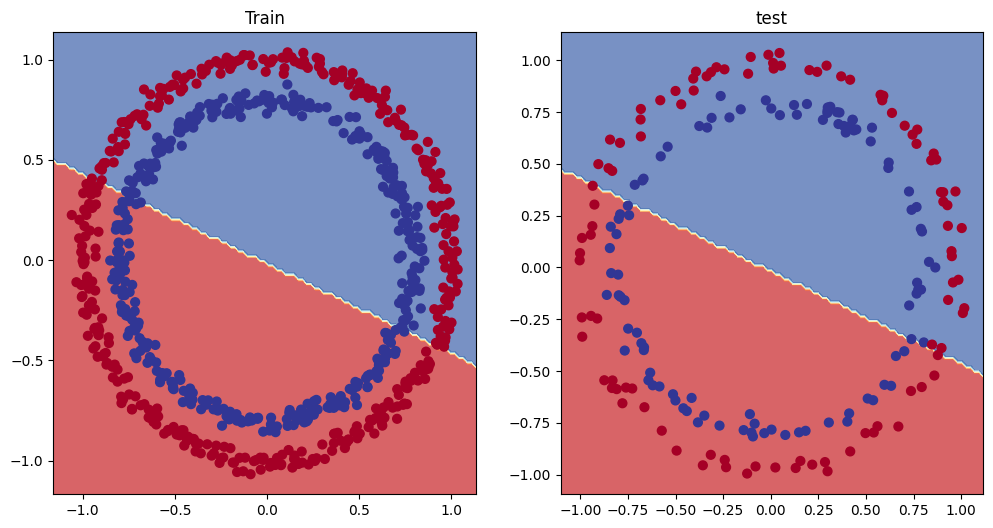

In [47]:
# Plot decision boundary of the model

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_1, X_test, y_test)


## 5.1 Preparing data to see out model can fit a straight line...

-> A good way to troubleshoot a larger problem is to test out on a smaller problem.

In [48]:
# Ctrate some data same as notebook 01

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01


# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim = 1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
# Create train and test splits
train_split = int (0.8 * len (X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

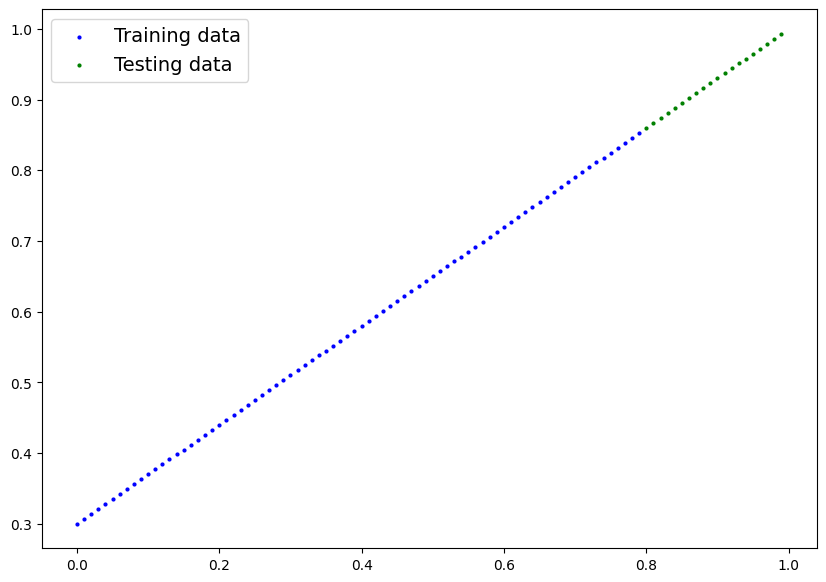

In [50]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None);

## 5.2 Adjusting model_1 to fit into a straight line

In [51]:
model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [52]:
# Loss and Optimizer
loss_fn3 = nn.L1Loss()
optimizer_3 = torch.optim.SGD(params = model_2.parameters(), lr=0.001)

In [53]:
## Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# epochs number
epochs = 2000

# put the data into the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = y_test_regression.to(device), y_test_regression.to(device)


## Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn3(y_pred, y_train_regression)
  optimizer_3.zero_grad()
  loss.backward()
  optimizer_3.step()

## Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn3(test_pred, y_test_regression)


## Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epochs: {epoch}, || Loss: {loss:.5f}, Test Loss: {test_loss:.5f}")

Epochs: 0, || Loss: 0.75986, Test Loss: 0.93980
Epochs: 100, || Loss: 0.40272, Test Loss: 0.52712
Epochs: 200, || Loss: 0.05876, Test Loss: 0.11776
Epochs: 300, || Loss: 0.01461, Test Loss: 0.01658
Epochs: 400, || Loss: 0.00308, Test Loss: 0.02195
Epochs: 500, || Loss: 0.00309, Test Loss: 0.02188
Epochs: 600, || Loss: 0.00309, Test Loss: 0.02182
Epochs: 700, || Loss: 0.00299, Test Loss: 0.02190
Epochs: 800, || Loss: 0.00299, Test Loss: 0.02183
Epochs: 900, || Loss: 0.00289, Test Loss: 0.02192
Epochs: 1000, || Loss: 0.00289, Test Loss: 0.02185
Epochs: 1100, || Loss: 0.00290, Test Loss: 0.02178
Epochs: 1200, || Loss: 0.00279, Test Loss: 0.02186
Epochs: 1300, || Loss: 0.00280, Test Loss: 0.02179
Epochs: 1400, || Loss: 0.00281, Test Loss: 0.02173
Epochs: 1500, || Loss: 0.00270, Test Loss: 0.02181
Epochs: 1600, || Loss: 0.00271, Test Loss: 0.02174
Epochs: 1700, || Loss: 0.00260, Test Loss: 0.02183
Epochs: 1800, || Loss: 0.00261, Test Loss: 0.02176
Epochs: 1900, || Loss: 0.00261, Test Loss: 

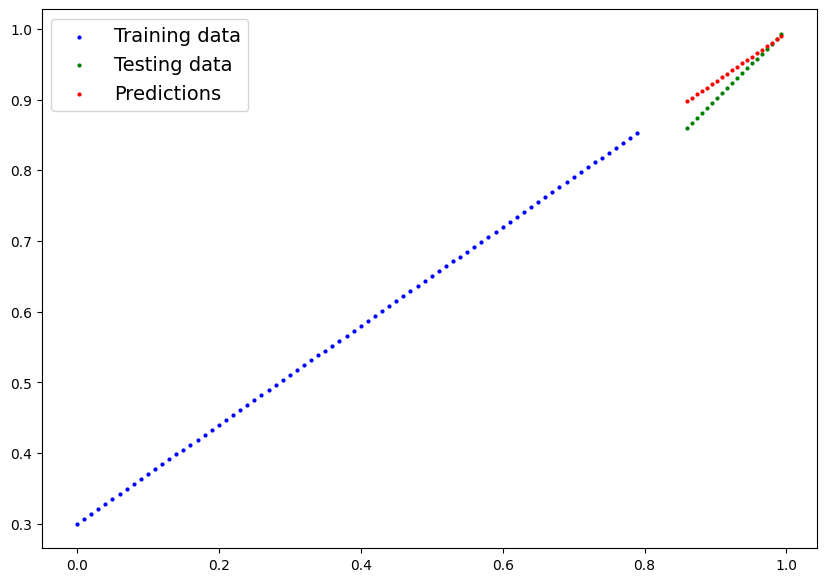

In [54]:
# Turn on eval() mode
model_2.eval()

# make predictions - inference_mode
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

# Plot predictions...

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());